In [1]:
#Import basic libaries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import itertools

#Data visualisation
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning) # setting ignore as a parameter and further adding category


## Data Understanding

In [2]:
# Read credit data from 'CC General.csv'
credit = pd.read_csv('CC GENERAL.csv')

In [3]:
credit

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
# information for credit - dtypes, rows and columns
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# credit rows and columns
credit.shape

(8950, 18)

## Data Preprocessing

In [6]:
# Drop CUST_ID not required
credit.drop(columns='CUST_ID', axis=1, inplace=True)

In [7]:
# Check if any missing value
credit.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
# Imputing CREDIT_LIMIT & MINIMUM_PAYMENTS as per BALANCE
print('Before Imputation:')
print(credit[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']].describe().T)
credit.sort_values(by='BALANCE', inplace=True)

# Fills missing values with mean and bfill
credit['CREDIT_LIMIT'].fillna(credit['CREDIT_LIMIT'].mean(), inplace=True)
credit['MINIMUM_PAYMENTS'].fillna(method='bfill', inplace=True)

print('\nAfter Imputation:')
print(credit[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']].describe().T)


Before Imputation:
                   count         mean          std        min          25%  \
CREDIT_LIMIT      8949.0  4494.449450  3638.815725  50.000000  1600.000000   
MINIMUM_PAYMENTS  8637.0   864.206542  2372.446607   0.019163   169.123707   

                          50%          75%          max  
CREDIT_LIMIT      3000.000000  6500.000000  30000.00000  
MINIMUM_PAYMENTS   312.343947   825.485459  76406.20752  

After Imputation:
                   count         mean          std        min          25%  \
CREDIT_LIMIT      8950.0  4494.449450  3638.612411  50.000000  1600.000000   
MINIMUM_PAYMENTS  8950.0   843.323173  2335.737040   0.019163   165.719355   

                          50%          75%          max  
CREDIT_LIMIT      3000.000000  6500.000000  30000.00000  
MINIMUM_PAYMENTS   297.559478   796.951391  76406.20752  


In [9]:
# Group numerical_feature
numerical_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

In [10]:
#len(credit['BALANCE'])
len(numerical_features)

17

In [11]:
# check if any duplicated value
credit.loc[credit.duplicated(),:]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [12]:
# Check if any negative value
(credit[numerical_features] <0).any()

BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

## Exploratory Data Analysis

In [13]:
def plot_distribution(feature):
    sns.displot(x=feature, data=credit, kde=True);
    plt.figtext(0.2, 1, '%s Distribution'%feature, fontfamily='serif', fontsize=17, fontweight='bold');
    

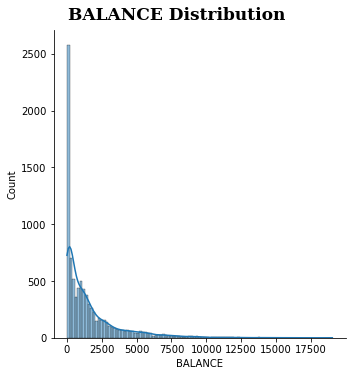

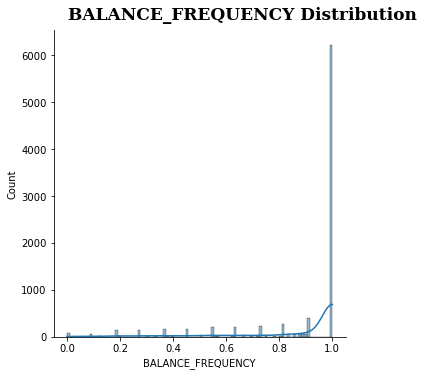

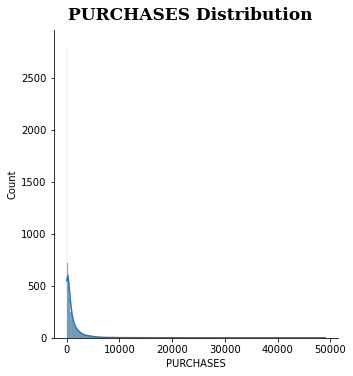

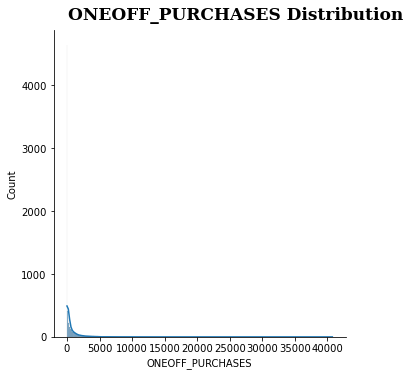

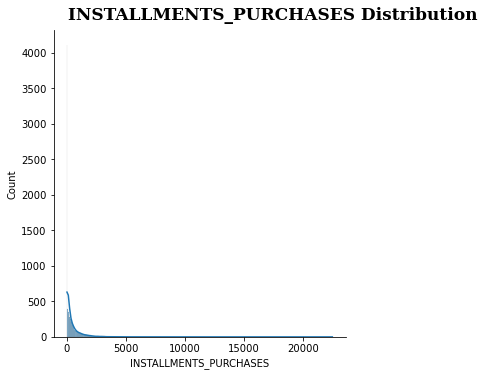

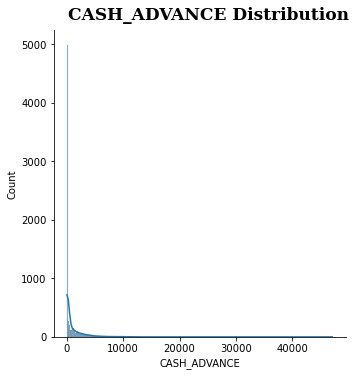

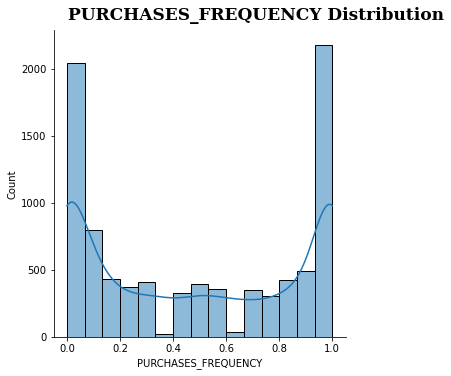

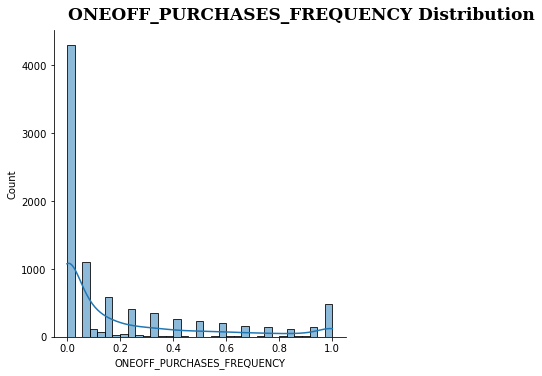

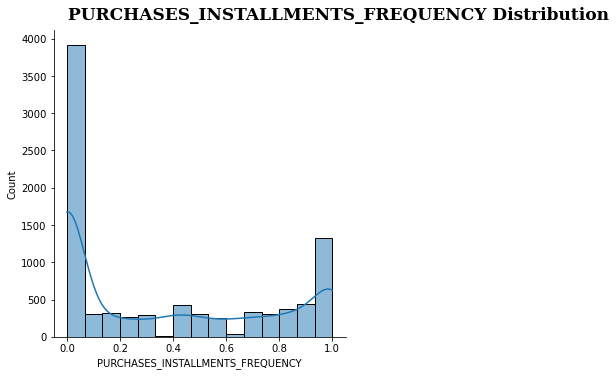

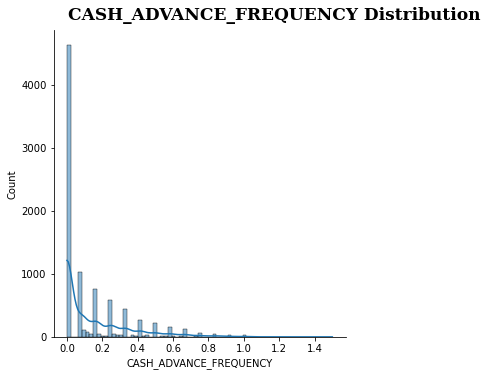

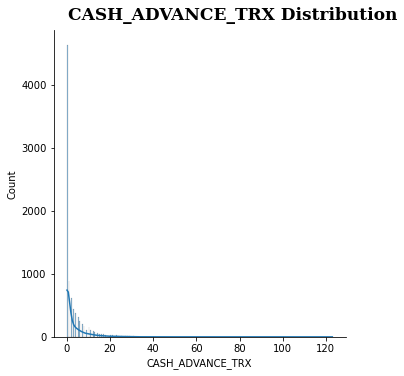

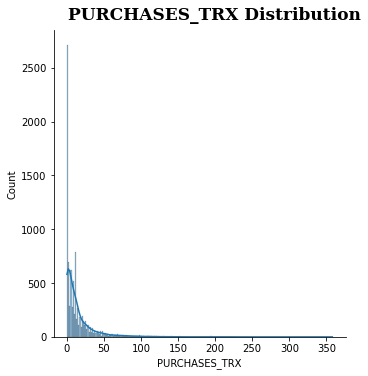

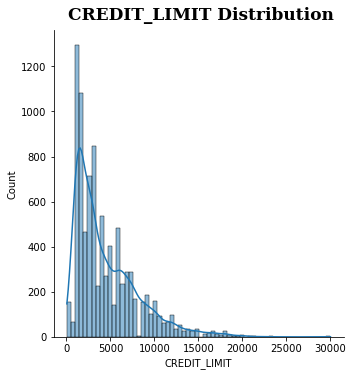

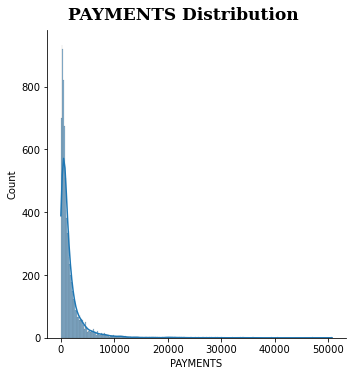

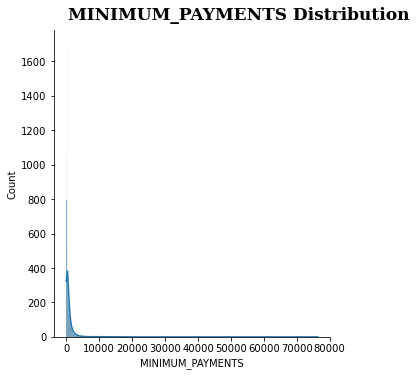

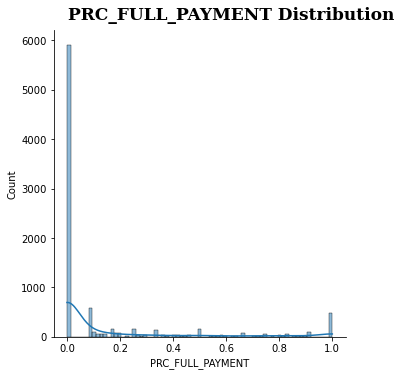

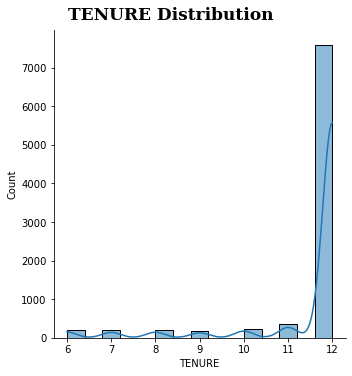

In [14]:
# looking at the distribution of data
for feature in numerical_features:
  plot_distribution(feature)

In [15]:
# data is highly skewed and hence taking log transformation
df = credit.copy()
skewed_features = ['BALANCE', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS']
#'PURCHASES_INSTALLMENTS_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'BALANCE_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 
#'PRC_FULL_PAYMENT', 'TENURE', 'cluster']\
for feature in skewed_features:
   credit[feature] = np.log(1+df[feature])

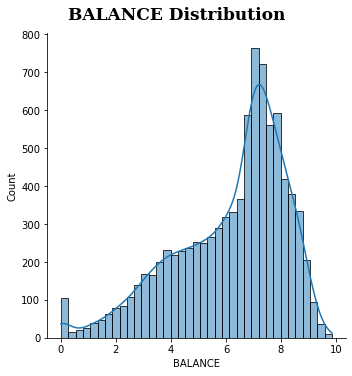

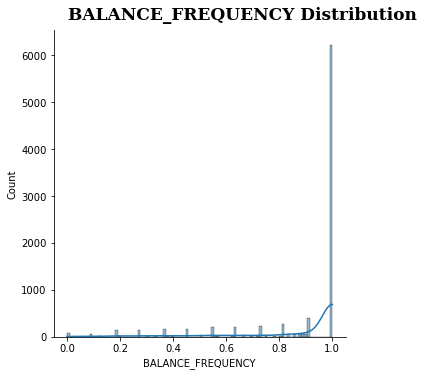

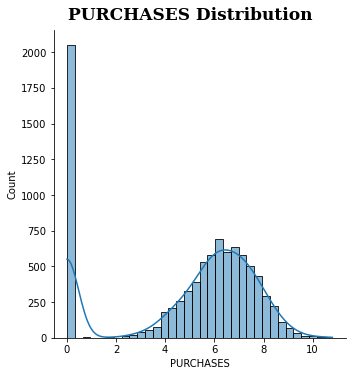

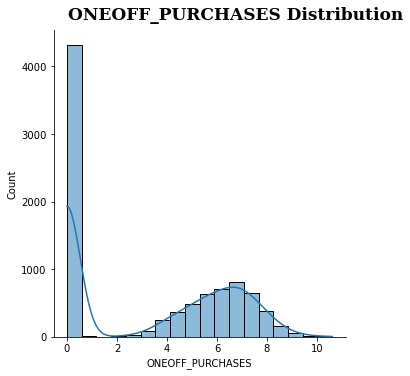

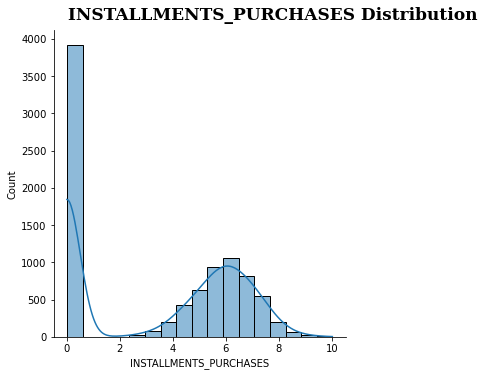

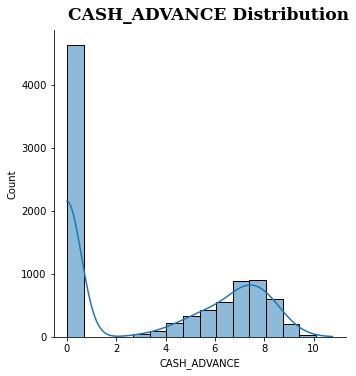

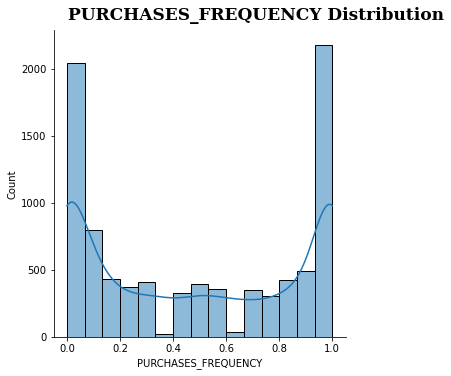

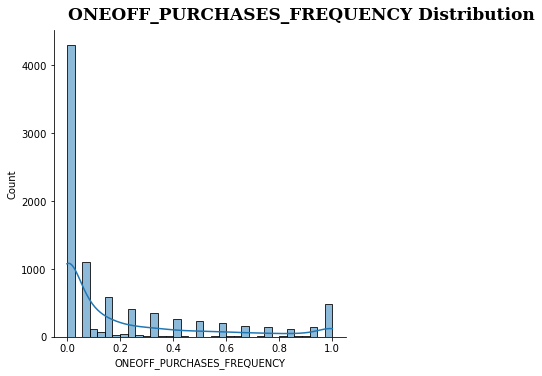

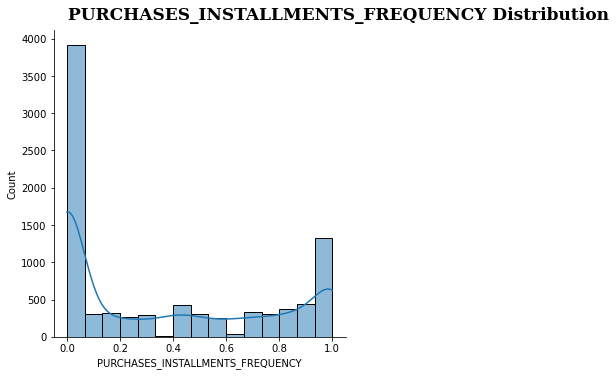

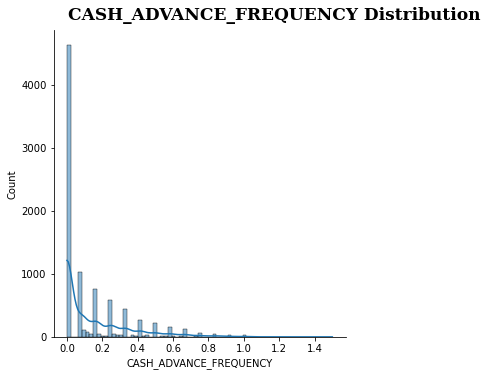

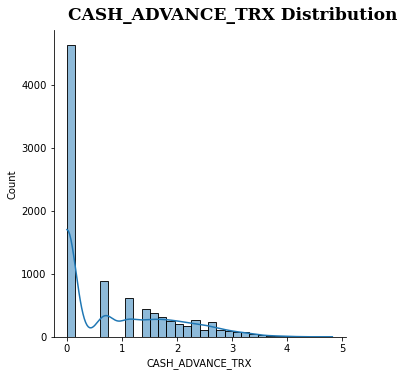

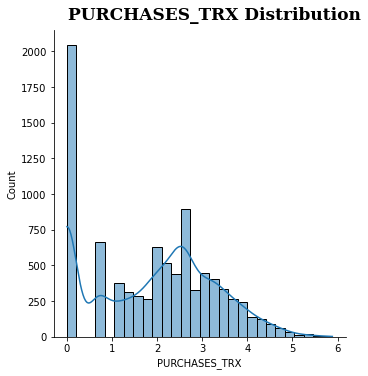

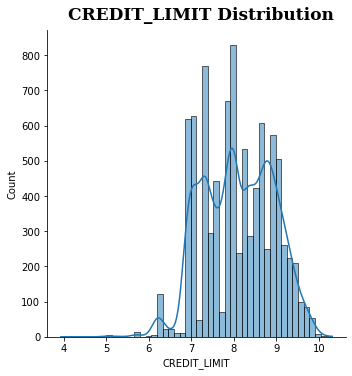

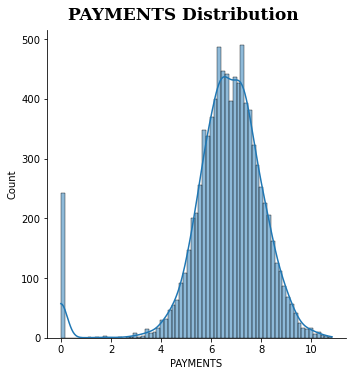

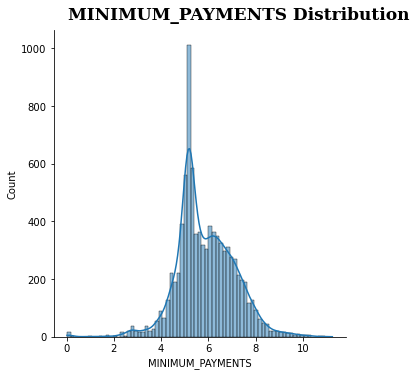

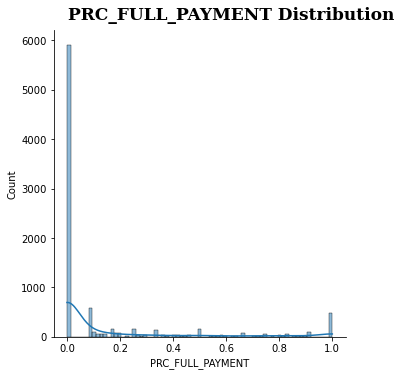

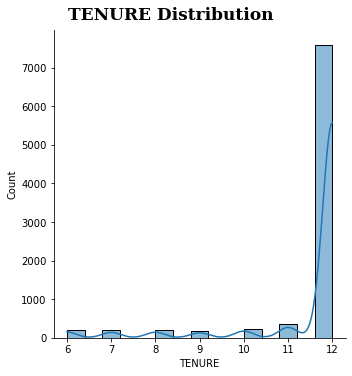

In [16]:
# After log transformation, look at the data
for feature in numerical_features:
  plot_distribution(feature)

In [17]:
credit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
860,0.0,0.0,5.302708,0.000000,5.302708,0.0,0.75,0.000000,0.75,0.0,0.0,2.708050,8.294300,0.000000,2.714305,0.0,12
4358,0.0,0.0,5.451896,0.000000,5.451896,0.0,1.00,0.000000,1.00,0.0,0.0,2.564949,7.313887,6.032135,2.714305,0.0,12
6972,0.0,0.0,5.977087,3.842673,5.854040,0.0,1.00,0.083333,1.00,0.0,0.0,2.639057,6.908755,0.000000,2.714305,0.0,12
8050,0.0,0.0,5.607859,0.000000,5.607859,0.0,1.00,0.000000,1.00,0.0,0.0,2.564949,7.601402,5.647916,2.714305,0.0,12
3070,0.0,0.0,4.163560,0.000000,4.163560,0.0,0.25,0.000000,0.25,0.0,0.0,1.386294,7.901377,0.000000,2.714305,0.0,12


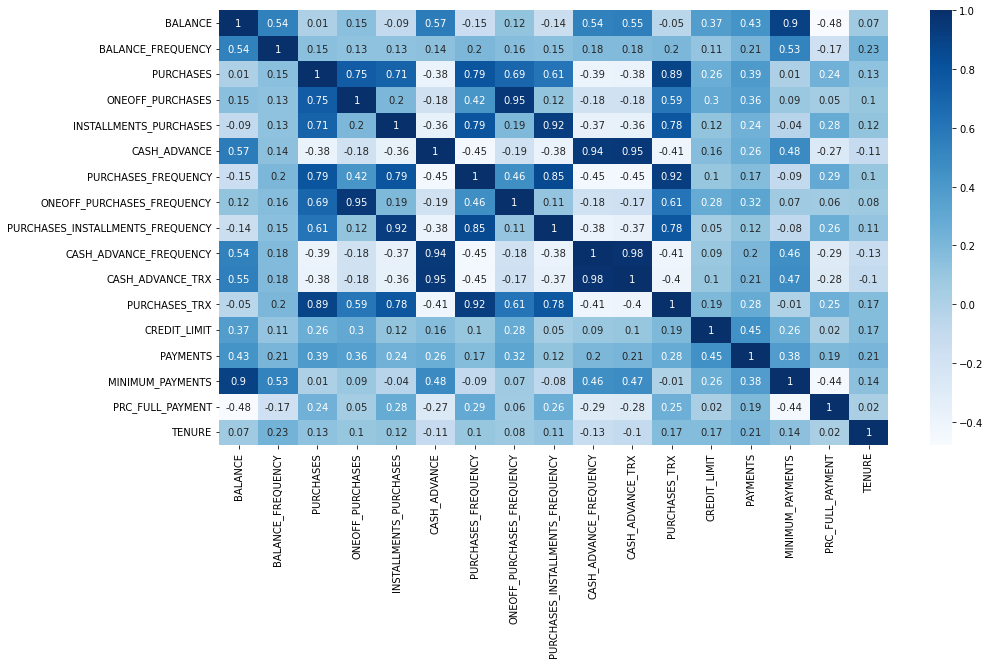

In [18]:
# Visualization Correlation by heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(round(credit[numerical_features].corr(method='spearman'), 2), 
            annot=True, mask=None, cmap="Blues")
plt.show()

In [19]:
# numerical_features > 0.5
corr_mat = credit[numerical_features].corr()
corr_mat = corr_mat.unstack()
corr_mat = corr_mat.sort_values(kind="quicksort").drop_duplicates()
corr_mat[corr_mat>0.5]

ONEOFF_PURCHASES_FREQUENCY        PURCHASES_FREQUENCY                 0.501343
BALANCE                           CASH_ADVANCE_TRX                    0.504146
CASH_ADVANCE                      BALANCE                             0.521648
BALANCE_FREQUENCY                 MINIMUM_PAYMENTS                    0.521962
ONEOFF_PURCHASES_FREQUENCY        PURCHASES                           0.547315
PURCHASES_TRX                     ONEOFF_PURCHASES                    0.574393
PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES                           0.592411
ONEOFF_PURCHASES_FREQUENCY        PURCHASES_TRX                       0.608430
BALANCE                           BALANCE_FREQUENCY                   0.652592
PURCHASES                         ONEOFF_PURCHASES                    0.683510
                                  INSTALLMENTS_PURCHASES              0.685390
PURCHASES_TRX                     PURCHASES_INSTALLMENTS_FREQUENCY    0.759533
ONEOFF_PURCHASES                  ONEOFF_PURCHASES_F

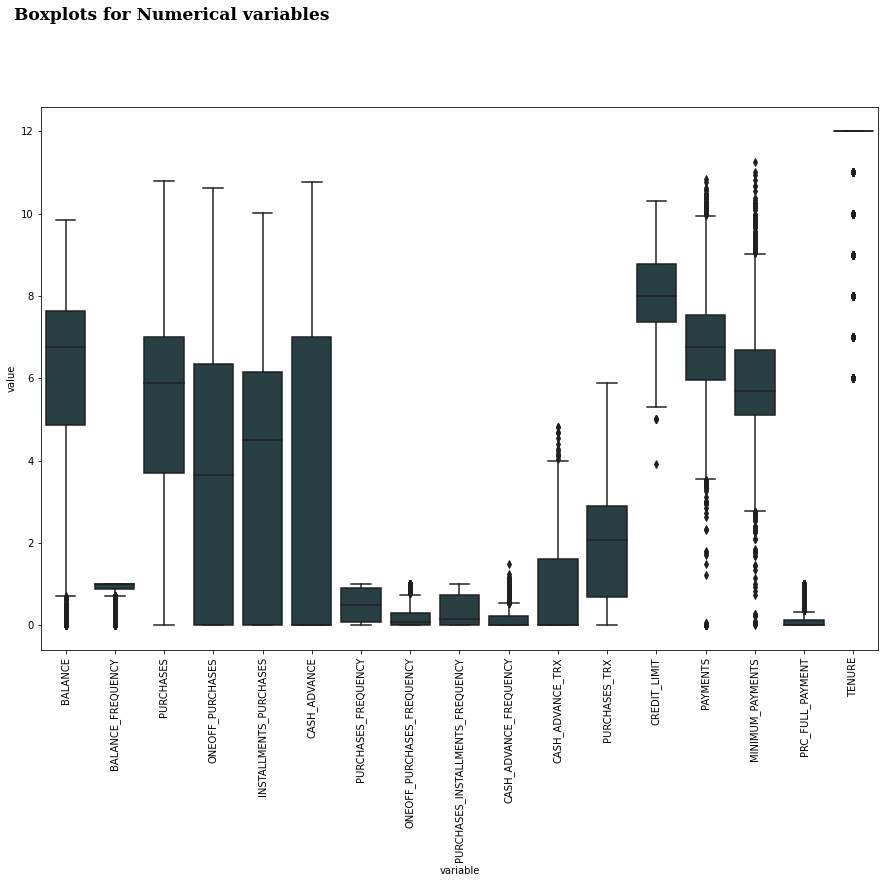

In [20]:
# Outliers
NumericData = credit[[feature for feature in numerical_features if feature not in []]]
NumericMelt = NumericData.melt()
plt.figure(figsize=(15,10))
plt.figtext(0.1, 1, "Boxplots for Numerical variables", fontfamily='serif', fontsize=17, fontweight='bold')
bp = sns.boxplot(x='variable', y='value', data=NumericMelt, palette=['#244247']*len(numerical_features))
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()


In [21]:
# Percentage of outliers present in each variable
outlier_percentage = {}
for feature in numerical_features:
    tempData = credit.sort_values(by=feature)[feature]
    Q1, Q3 = tempData.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)
    outlier_percentage[feature] = round((((tempData<(Q1 - 1.5 * IQR)) | (tempData>(Q3 + 1.5 * IQR))).sum()/tempData.shape[0])*100,2)
outlier_percentage

{'BALANCE': 1.47,
 'BALANCE_FREQUENCY': 16.68,
 'PURCHASES': 0.0,
 'ONEOFF_PURCHASES': 0.0,
 'INSTALLMENTS_PURCHASES': 0.0,
 'CASH_ADVANCE': 0.0,
 'PURCHASES_FREQUENCY': 0.0,
 'ONEOFF_PURCHASES_FREQUENCY': 8.74,
 'PURCHASES_INSTALLMENTS_FREQUENCY': 0.0,
 'CASH_ADVANCE_FREQUENCY': 5.87,
 'CASH_ADVANCE_TRX': 0.17,
 'PURCHASES_TRX': 0.0,
 'CREDIT_LIMIT': 0.07,
 'PAYMENTS': 3.55,
 'MINIMUM_PAYMENTS': 2.25,
 'PRC_FULL_PAYMENT': 16.47,
 'TENURE': 15.26}

## Model 1: KMeans Clustering

In [22]:
# BALANCE and PURCHASES Predictor
x = credit.iloc[:, [0,2]].values 

In [23]:
x

array([[0.        , 5.30270771],
       [0.        , 5.45189645],
       [0.        , 5.97708668],
       ...,
       [9.69928163, 7.47962144],
       [9.82533997, 8.57343741],
       [9.85451465, 9.99929397]])

<function matplotlib.pyplot.show(close=None, block=None)>

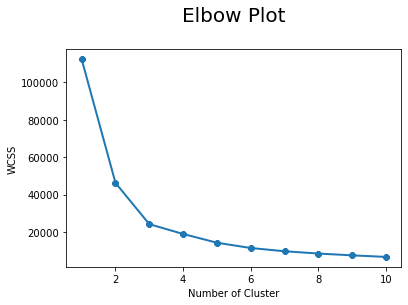

In [24]:
# Import kMean from sklean
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss,linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show


In [25]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)
print(kmeans.cluster_centers_)

[2 2 2 ... 0 0 0]
[[7.15161054 6.74155652]
 [7.05990326 0.08598022]
 [3.47544049 5.65520196]]


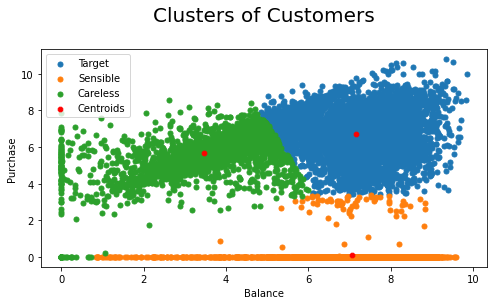

In [26]:
#Visualization
plt.figure(figsize = (8,4))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], label='Target',s=25)
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], label='Sensible',s=25)
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], label='Careless',s=25)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 25, marker='8', label='Centroids')
plt.title('Clusters of Customers\n', fontsize = 20)
plt.xlabel('Balance')
plt.ylabel('Purchase')
plt.legend(loc='best')
plt.show()

- Target (Blue) group have a higher balance and higher purchases.
- Sensible (Orange) group have a high balance but low purchases.
- Careless (Green) group have a lower balance but high purchases.


## Model 2: Hierarchical Clustering

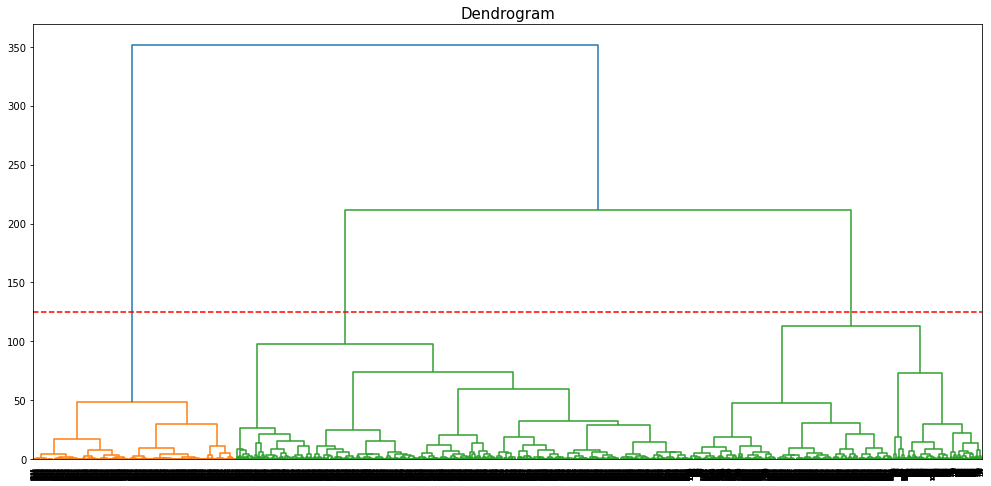

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
plt.figure(figsize = (17, 8))

dendo = dendrogram(linkage(x, method = 'ward'))
plt.axhline(y=125, color='r', linestyle='--')
plt.title('Dendrogram', fontsize = 15)
plt.show()

In [28]:
# Import the agglomerative/hierarchical cluster from scikit learn 
from sklearn.cluster import AgglomerativeClustering

In [29]:
# init the model
hc= AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
# By default, affinity = 'euclidean', linkage = 'ward'
# affinity means distance

In [30]:
# fit and predict 
y_hc = hc.fit_predict(x)
y_hc

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

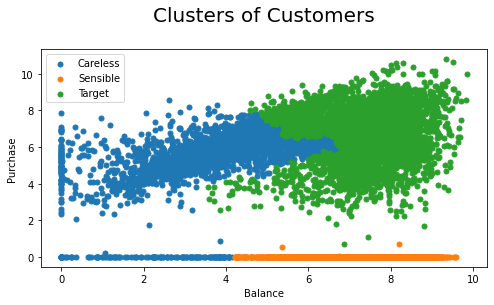

In [31]:
plt.figure(figsize = (8, 4))

plt.scatter(x[y_hc == 0,0], x[y_hc == 0,1], label = 'Careless', s = 25)
plt.scatter(x[y_hc == 1,0], x[y_hc == 1,1], label = 'Sensible', s = 25)
plt.scatter(x[y_hc == 2,0], x[y_hc == 2,1], label = 'Target', s = 25)
#plt.scatter(x[y_hc == 3,0], x[y_hc == 3,1], label = 'Cluster 4', s = 100)
#plt.scatter(x[y_hc == 4,0], x[y_hc == 4,1], label = 'Cluster 5', s = 100)
#plt.scatter(x[y_hc == 5,0], x[y_hc == 5,1], label = 'Cluster 6', s = 100)

plt.title('Clusters of Customers\n ', fontsize = 20)
plt.xlabel('Balance')
plt.ylabel('Purchase')
plt.legend(loc='best')
plt.show()

In [32]:
# Assign each customer into their cluster group
from pandas import Series, DataFrame
credit['cluster group'] = Series(y_hc, index=credit.index)
credit

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster group
860,0.000000,0.0,5.302708,0.000000,5.302708,0.000000,0.75,0.000000,0.750000,0.000000,0.000000,2.708050,8.294300,0.000000,2.714305,0.0,12,0
4358,0.000000,0.0,5.451896,0.000000,5.451896,0.000000,1.00,0.000000,1.000000,0.000000,0.000000,2.564949,7.313887,6.032135,2.714305,0.0,12,0
6972,0.000000,0.0,5.977087,3.842673,5.854040,0.000000,1.00,0.083333,1.000000,0.000000,0.000000,2.639057,6.908755,0.000000,2.714305,0.0,12,0
8050,0.000000,0.0,5.607859,0.000000,5.607859,0.000000,1.00,0.000000,1.000000,0.000000,0.000000,2.564949,7.601402,5.647916,2.714305,0.0,12,0
3070,0.000000,0.0,4.163560,0.000000,4.163560,0.000000,0.25,0.000000,0.250000,0.000000,0.000000,1.386294,7.901377,0.000000,2.714305,0.0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5281,9.687605,1.0,6.530499,4.666265,6.363786,8.379080,1.00,0.083333,1.000000,0.583333,2.772589,2.772589,9.798183,8.173875,8.656039,0.0,12,2
6629,9.696491,1.0,8.522316,8.184081,7.274639,5.798178,1.00,0.833333,1.000000,0.083333,1.098612,4.969813,9.798183,8.514837,8.544517,0.0,12,2
5488,9.699282,1.0,7.479621,0.000000,7.479621,8.912621,0.50,0.000000,0.416667,0.666667,2.639057,2.302585,9.852247,8.582786,9.029615,0.0,12,2
4140,9.825340,1.0,8.573437,8.204754,7.397549,0.000000,1.00,0.583333,1.000000,0.000000,0.000000,4.343805,9.998843,8.354008,8.349504,0.0,12,2


In [33]:
# print number of instances in each cluster group
credit['cluster group'].value_counts()

2    4276
0    2758
1    1916
Name: cluster group, dtype: int64

## Model 3: DBSCAN Clustering

In [34]:
# import the DBSCAN cluster and scaler from scikit learn 
from sklearn.cluster import DBSCAN

In [35]:
# Apply dbscan cluster
db = DBSCAN(eps=0.5, min_samples = 10, metric='euclidean')
#epsilon = eps

# fit the model for prediction
clusters = db.fit_predict(x)

In [36]:
# fit the model for prediction
credit['Cluster'] = clusters
credit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster group,Cluster
860,0.0,0.0,5.302708,0.000000,5.302708,0.0,0.75,0.000000,0.75,0.0,0.0,2.708050,8.294300,0.000000,2.714305,0.0,12,0,0
4358,0.0,0.0,5.451896,0.000000,5.451896,0.0,1.00,0.000000,1.00,0.0,0.0,2.564949,7.313887,6.032135,2.714305,0.0,12,0,0
6972,0.0,0.0,5.977087,3.842673,5.854040,0.0,1.00,0.083333,1.00,0.0,0.0,2.639057,6.908755,0.000000,2.714305,0.0,12,0,0
8050,0.0,0.0,5.607859,0.000000,5.607859,0.0,1.00,0.000000,1.00,0.0,0.0,2.564949,7.601402,5.647916,2.714305,0.0,12,0,0
3070,0.0,0.0,4.163560,0.000000,4.163560,0.0,0.25,0.000000,0.25,0.0,0.0,1.386294,7.901377,0.000000,2.714305,0.0,12,0,0


In [37]:
# The labels_ property contains the list of clusters and their respective points
clusters = db.labels_
clusters

array([ 0,  0,  0, ...,  0,  0, -1], dtype=int64)

In [38]:
from pandas import Series, DataFrame

In [39]:
credit['cluster group'] = Series(clusters, index=credit.index)
credit

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster group,Cluster
860,0.000000,0.0,5.302708,0.000000,5.302708,0.000000,0.75,0.000000,0.750000,0.000000,0.000000,2.708050,8.294300,0.000000,2.714305,0.0,12,0,0
4358,0.000000,0.0,5.451896,0.000000,5.451896,0.000000,1.00,0.000000,1.000000,0.000000,0.000000,2.564949,7.313887,6.032135,2.714305,0.0,12,0,0
6972,0.000000,0.0,5.977087,3.842673,5.854040,0.000000,1.00,0.083333,1.000000,0.000000,0.000000,2.639057,6.908755,0.000000,2.714305,0.0,12,0,0
8050,0.000000,0.0,5.607859,0.000000,5.607859,0.000000,1.00,0.000000,1.000000,0.000000,0.000000,2.564949,7.601402,5.647916,2.714305,0.0,12,0,0
3070,0.000000,0.0,4.163560,0.000000,4.163560,0.000000,0.25,0.000000,0.250000,0.000000,0.000000,1.386294,7.901377,0.000000,2.714305,0.0,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5281,9.687605,1.0,6.530499,4.666265,6.363786,8.379080,1.00,0.083333,1.000000,0.583333,2.772589,2.772589,9.798183,8.173875,8.656039,0.0,12,0,0
6629,9.696491,1.0,8.522316,8.184081,7.274639,5.798178,1.00,0.833333,1.000000,0.083333,1.098612,4.969813,9.798183,8.514837,8.544517,0.0,12,0,0
5488,9.699282,1.0,7.479621,0.000000,7.479621,8.912621,0.50,0.000000,0.416667,0.666667,2.639057,2.302585,9.852247,8.582786,9.029615,0.0,12,0,0
4140,9.825340,1.0,8.573437,8.204754,7.397549,0.000000,1.00,0.583333,1.000000,0.000000,0.000000,4.343805,9.998843,8.354008,8.349504,0.0,12,0,0


In [40]:
# print number of instances in each cluster group, Note that -1 represents noises/outliers
credit['cluster group'].value_counts()

 0    6858
 1    2050
-1      42
Name: cluster group, dtype: int64

In [41]:
#  map every individual cluster to a color for visualization
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'red']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])


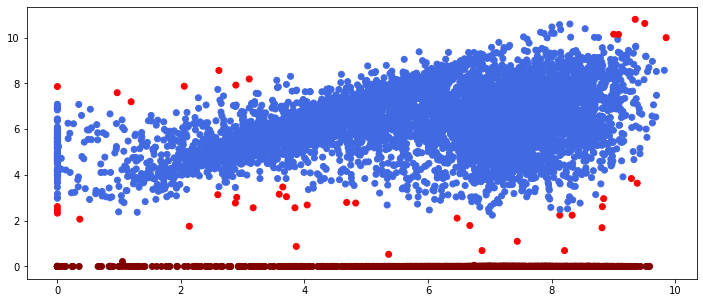

In [42]:
# all the red points were categorized as noise
plt.figure(figsize=(12,5))
plt.scatter(x[:,0], x[:,1], c=vectorizer(clusters))

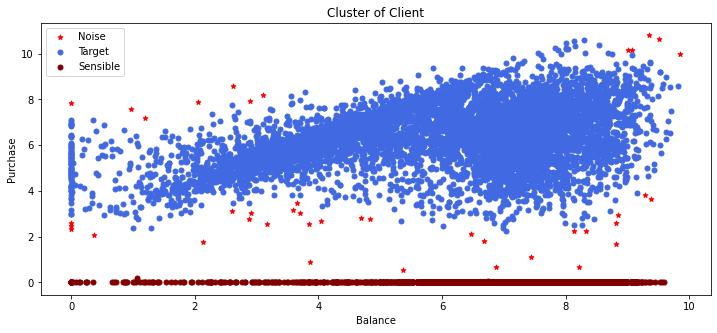

In [43]:
# Another way to visualize the Cluster groups
#-1 come from the output from min to max
plt.figure(figsize=(12,5))
plt.scatter(x[clusters == -1, 0], x[clusters == -1, 1], s=25, c='red', marker='*', label = 'Noise') #outliers
plt.scatter(x[clusters == 0, 0], x[clusters == 0, 1], s=25, c='royalblue', marker='o', label = 'Target')
plt.scatter(x[clusters == 1, 0], x[clusters == 1, 1], s=25, c='maroon', marker='o',label = 'Sensible')
plt.title('Cluster of Client')
plt.xlabel('Balance')
plt.ylabel('Purchase')
plt.legend()
plt.show()

- DBSCAN no need to define no. of cluster and is able to identify outlier